# Linear Regression Assignment

#### The assignment can be divided into following steps: 
1. Reading and Understanding Data
2. Visualizing the data
3. Data Preparation
4. Splitting the Data into Training and Testing datasets. 
5. Rescaling the features
6. Building the Linear model
7. Residual analysis on the training data
8. Making Predictions using Final Model
9. Model Evaluation 
10. Results






## Step 1: Reading and Understanding Data

In [129]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import calendar
import os

In [130]:
#Get the current working directory 
cwd = os.getcwd()
print(cwd)
# Place the downloaded day.csv in your current working directory
filepath=cwd+'/day.csv'

/Users/poojaravishankar/Downloads/LinearRegressionAssignment


In [131]:
# Reading data file and display top few records of the data frame
bike_df = pd.read_csv(filepath)
#bike_df = pd.read_csv('/Users/poojaravishankar/Documents/day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [132]:
# Check the dimensions of the bike data frame
bike_df.shape

(730, 16)

In [133]:
#Check for missing values and data types of the different columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [134]:
# Check statistical information of the bikedata
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observations : As the difference between mean and median is not much , we can conclude that data has no outliers

## Step 2: Visualising the Data

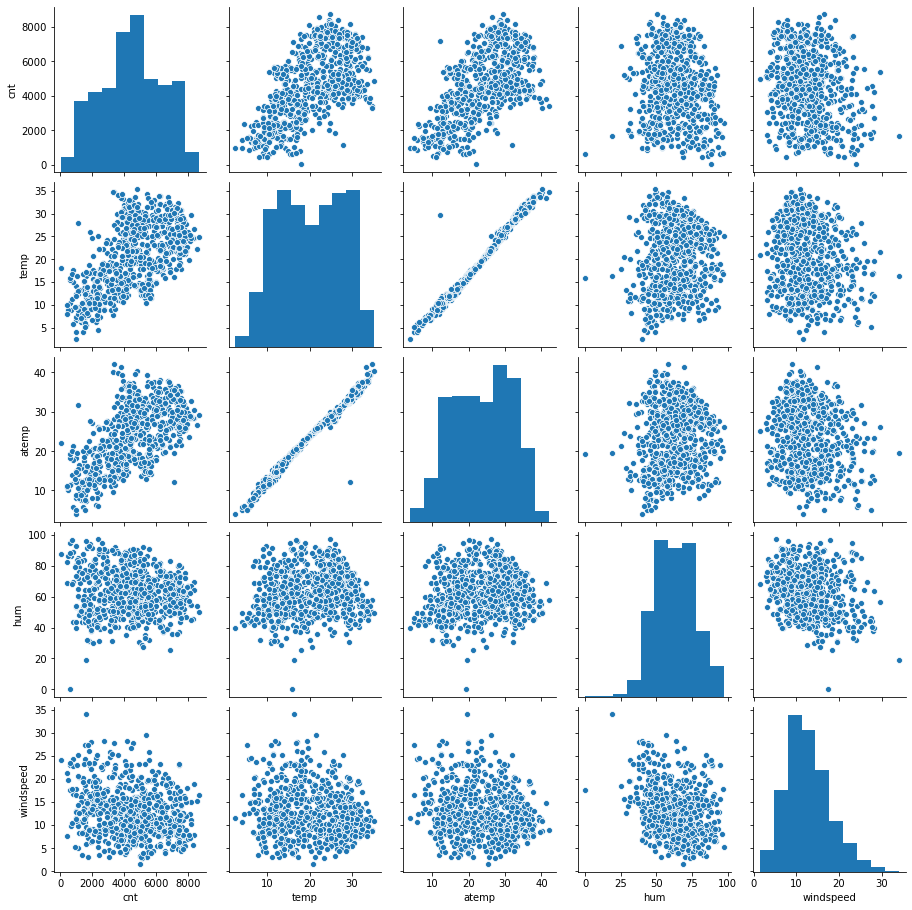

In [135]:
#Visualising continuos variables using pairplots
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

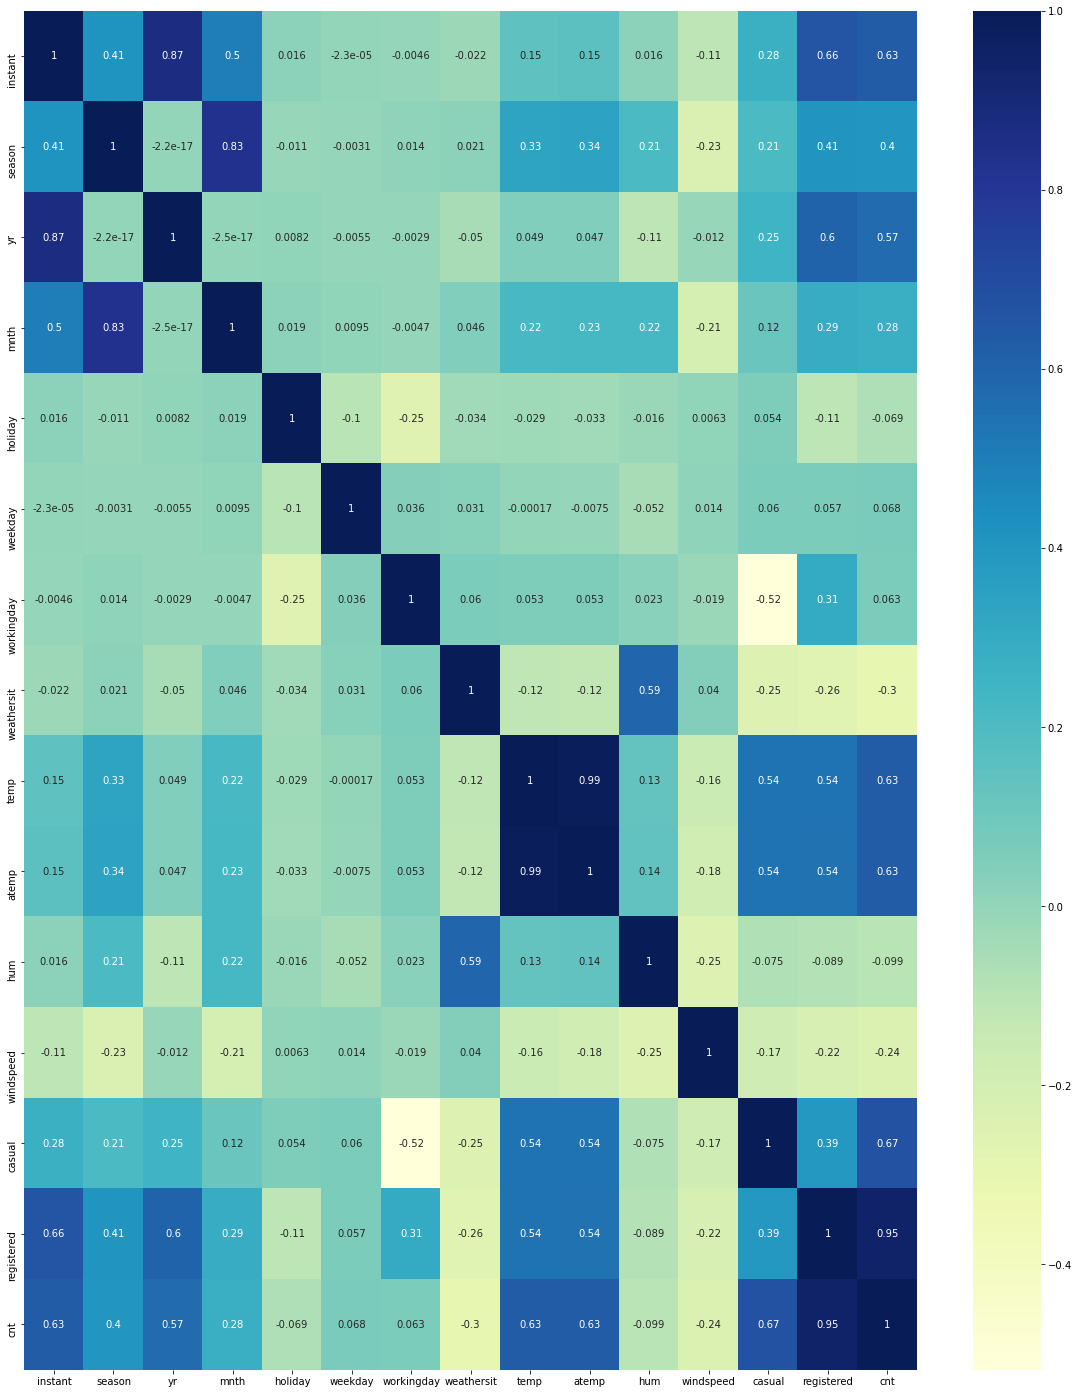

In [136]:
# Check the correlation by drawing a heatmap
plt.figure(figsize = (20,25))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [137]:
#Correlation between temp and atemp is 0.99 which is almost 1
#Let us drop atemp and consider temp

bike_df.drop(['atemp'],axis=1,inplace=True)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


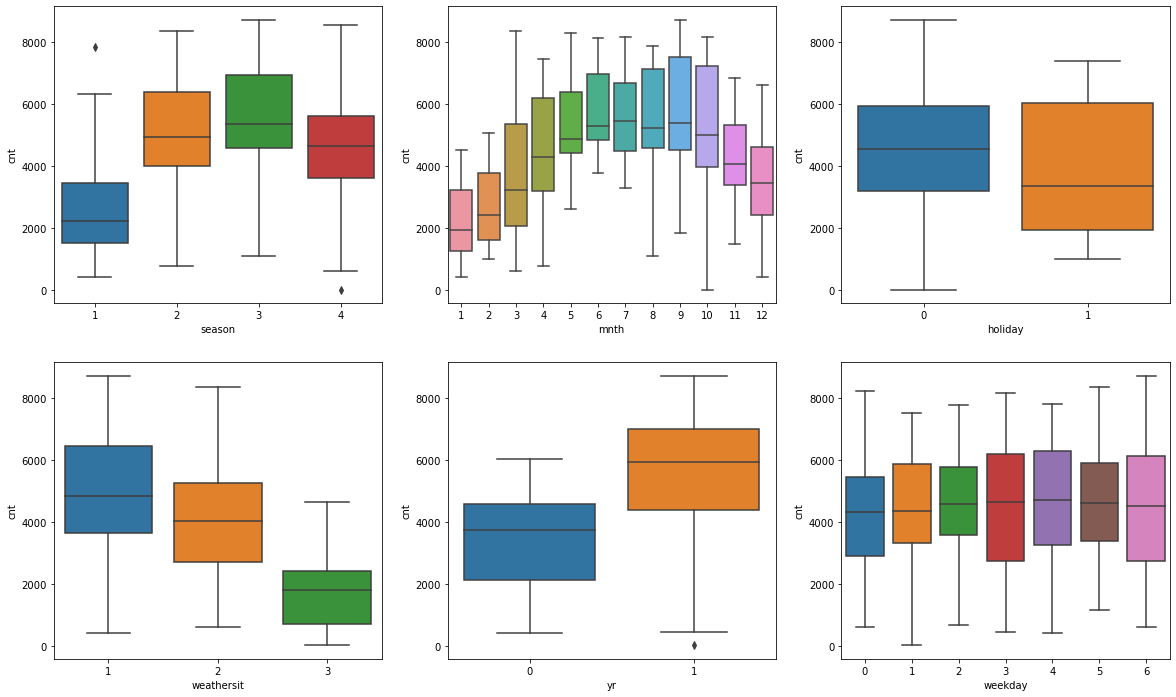

In [138]:
# Visualising Categorical variables using boxplots
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.show()

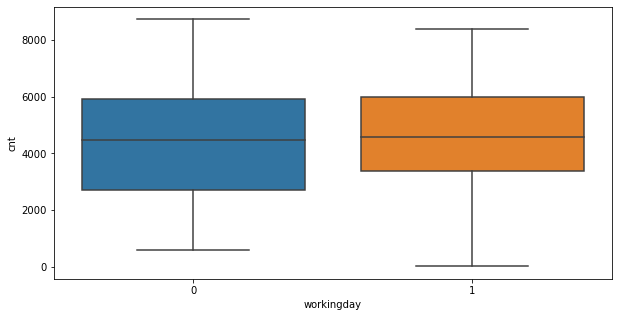

In [139]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

#### Observations : 
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays
- The cnt values is least for spring

## Step 3: Data Preparation

In [140]:
# Drop columns that are not significant predictors for the model - 
bike_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [141]:
# Converting  numeric values to categorical data
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])

In [142]:
# Mapping of the seasons
bike_df.season = bike_df.season.map({1: 'spring',2:'summer',3:'fall',4:'winter'})

In [143]:
# Mapping of  weather situation
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Rain & Ice pallets'})

In [144]:
# Mapping the week of the day 
bike_df.weekday = bike_df.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [145]:
# Check the top N records of the dataframe 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


### Create Dummy Variables

In [146]:
# Creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_df[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )

In [147]:
# Adding dummy variables to the original dataset
bike_df = pd.concat([dummy,bike_df],axis = 1)

In [148]:
# Check the top N records of data frame
bike_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [149]:
bike_df.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'season', 'yr', 'mnth', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

In [150]:
# Drop the columns for which dummy variables were created
bike_df.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)
bike_df.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [151]:
# Checking the dimensions of the dataset again 
bike_df.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

In [152]:
train, test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5 :Rescaling the Features 

In [153]:
#Creating the MinMax scaler object 
scaler = MinMaxScaler()

In [154]:
# Apply scaler function to all the columns except the dummy variables
num_vars = ['cnt','hum','windspeed','temp']
train[num_vars] = scaler.fit_transform(train[num_vars])

In [155]:
#Check the top n records of the train data frame
train.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [156]:
# Check for the statistical components of train data frame
train.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.158824,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.365870,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

We will first build a model using all the columns

In [157]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [158]:
# Create an object of Linear regression 
lm = LinearRegression()
lm.fit(X_train, y_train)

#  Running RFE with the top n features equal to 13
rfe = RFE(lm, 13)            
rfe = rfe.fit(X_train, y_train)

In [159]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 16),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Model 1 : # Start with all columns selected by RFE

In [160]:
#Print Columns selected by RFE. 
col = X_train.columns[rfe.support_]
print(col)

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')


In [161]:
# Remove columns with False status
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday'],
      dtype='object')

In [162]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [163]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the parameters 
lm.params

const                           0.279640
season_spring                  -0.056290
season_summer                   0.052092
season_winter                   0.098387
mnth_Jul                       -0.057853
mnth_Sep                        0.082751
weekday_Saturday                0.017490
weathersit_Light Snow & Rain   -0.239456
weathersit_Mist & Cloudy       -0.054750
yr                              0.229791
holiday                        -0.094469
temp                            0.530609
hum                            -0.168105
windspeed                      -0.183143
dtype: float64

In [164]:
# Print a summary of the linear regression model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          7.51e-190
Time:                        12:01:15   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [165]:
# Dropping weekday_Saturday as it has p > 0.05
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

Rebuilding the model without 'weekday_Saturday'

### Model 2

In [166]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [167]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.69e-190
Time:                        12:01:16   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2841      0.034      8.242      0.000       0.216       0.352
season_spring                   -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_summer                    0.0519      0.015      3.457      0.001       0.022       0.081
season_winter                    0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                        -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                               0.2293      0.008     28.219      0.000       0.213       0.245
holiday                         -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                             0.5300      0.034     15.739      0.000       0.464       0.596
hum                             -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                       -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [168]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_spring,5.02
10,temp,3.61
3,season_winter,3.49
2,season_summer,2.61
11,hum,1.90
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [169]:
X_train_new = X_train_new.drop(['season_spring'], axis=1)

### Model 3

In [170]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [171]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.89e-190
Time:                        12:01:16   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF for multicollinearity

In [172]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
10,hum,1.87
9,temp,1.60
6,weathersit_Mist & Cloudy,1.55
3,mnth_Jul,1.43
1,season_summer,1.33
2,season_winter,1.29
5,weathersit_Light Snow & Rain,1.24
4,mnth_Sep,1.19
11,windspeed,1.18


In [173]:
X_train_new = X_train_new.drop(['mnth_Jul'], axis=1)

## Final Model

In [174]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [175]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          7.80e-190
Time:                        12:01:16   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF for multicollinearity

In [176]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
9,hum,1.86
5,weathersit_Mist & Cloudy,1.55
8,temp,1.27
2,season_winter,1.25
4,weathersit_Light Snow & Rain,1.23
1,season_summer,1.19
10,windspeed,1.18
3,mnth_Sep,1.11
6,yr,1.03


In [177]:
print(X_train.columns)

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')


## Step 7: Residual Analysis of the train data

In [178]:
y_train_cnt = lm.predict(X_train_lm)

In [179]:
X_train.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

Text(0.5, 0, 'Errors')

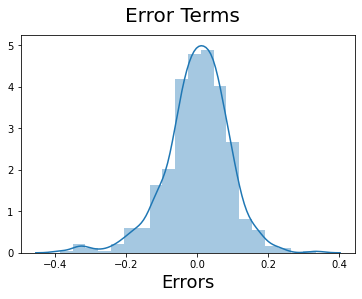

In [180]:
# Plot the histogram of the error terms to check if the error terms are ormally distributed: Major assumptions of Linear regression
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                         

Text(0, 0.5, 'Error terms')

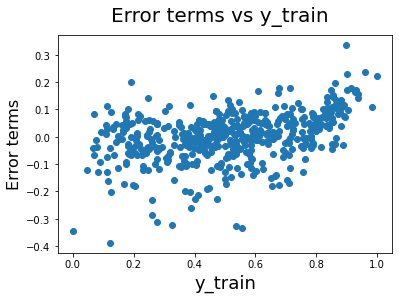

In [181]:
# Check if error terms are independent of each other and have constant variance : Assumptions of Linear Regression
fig = plt.figure()
plt.scatter(y_train, y_train - y_train_cnt)
fig.suptitle('Error terms vs y_train', fontsize = 20)             
plt.xlabel('y_train', fontsize = 18)                         
plt.ylabel('Error terms', fontsize = 16) 

Observation : There is no pattern in the distribution, hence we can colclude that the error terms are independent of each other and have constant variance

## Step 8: Making Predictions Using the Final Model

In [182]:
num_vars = ['cnt','hum','windspeed','temp']
#Applying the scaling on the test sets
test[num_vars] = scaler.transform(test[num_vars])

In [183]:
test.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.100457,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.301297,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [184]:
#Dividing into X_test and y_test
y_test = test.pop('cnt')
X_test = test

In [185]:
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_summer                 219 non-null    uint8  
 2   season_winter                 219 non-null    uint8  
 3   mnth_Sep                      219 non-null    uint8  
 4   weathersit_Light Snow & Rain  219 non-null    uint8  
 5   weathersit_Mist & Cloudy      219 non-null    uint8  
 6   yr                            219 non-null    int64  
 7   holiday                       219 non-null    int64  
 8   temp                          219 non-null    float64
 9   hum                           219 non-null    float64
 10  windspeed                     219 non-null    float64
dtypes: float64(4), int64(2), uint8(5)
memory usage: 13.0 KB


In [186]:
# Predicting using the final model

y_pred = lm.predict(X_test)

In [187]:
# Compute mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.00927873122687518

In [188]:
# Compute the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8046410496371389

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

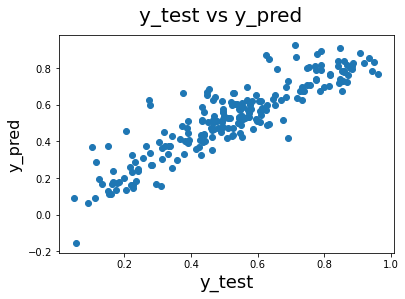

In [189]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize = 20)    
# X-label
plt.xlabel('y_test', fontsize = 18)   
#y-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()

In [190]:
#Computing the coefficients of the independent variables/predictor variables
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
8,temp,0.570606
6,yr,0.228914
0,const,0.225646
2,season_winter,0.140200
3,mnth_Sep,0.106731
1,season_summer,0.089525
5,weathersit_Mist & Cloudy,-0.051831
7,holiday,-0.097964
9,hum,-0.173973


## Step 10: Results 

The equation of the best fitted line is:

 cnt = 0.225646 + 0.570606  X  temp + 0.228914  X  yr + 0.140200 X season_Winter + 0.106731 X mnth_Sep+ 0.089525 X season_Summer - 0.051831 X weathersit_Mist & Cloudy-0.097964 X holiday - 0.173973 X hum  - 0.186706 X windspeed -0.236675 X weathersit_Light Snow & Rain 

##### All the positive coefficients like temp,season_Summer  etc  indicate that a unit increase in these values will lead to an increase in the value of cnt by the respective coefficient values.

##### All the negative coefficients  indicate that a unit increase in these values will lead to an decrease in the value of cnt by the respective coefficient values.

- Temp is the most significant with the largest coefficient.
- The rentals reduce during holidays

This indicates that the bike rentals is majorly affected by temperature,season and month.